In [1]:
import pandas as pd
import numpy as np
import os
import random

from mlchartist.array_builder import build_arrays
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [2]:
min_len = 1000

filenames = []

for file in os.listdir(r'../raw_data/processed'):
    if file.endswith('.csv'):
        with open('../raw_data/processed/' + file) as f:
            rows_num = sum(1 for line in f)
            if rows_num >= min_len:
                filenames.append(file)
                    

In [3]:
len(filenames)

2065

In [4]:
all_count = len(filenames)

In [5]:
dfs = []

for ticker in filenames:
    ticker_df = pd.read_csv('../raw_data/processed/'+ticker)
    dfs.append(ticker_df)

In [6]:
df = pd.concat(dfs)

In [7]:
#df = pd.read_csv('../raw_data/processed/aapl.csv')

In [6]:
df.tail()

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,MACD,MACD_diff,MACD_signal,5TD_return,10TD_return,20TD_return,1D_past_return,5D_past_return,10D_past_return
3765,BWEN,2020-12-17,50.088731,30.442653,34.276904,-3.037682e+07,34903559,0.369723,20.190405,20.629933,14.519122,0.024685,-0.040727,0.065412,0.458738,0.917476,1.012136,-0.021378,0.035176,-0.023697
3766,BWEN,2020-12-18,54.586847,57.745918,40.838976,-3.040492e+07,35266168,0.375000,20.596761,22.574419,13.292327,0.037576,-0.022269,0.059845,1.020785,0.692841,1.394919,0.050971,0.118863,-0.004598
3767,BWEN,2020-12-21,56.009994,64.715253,50.967941,-3.029497e+07,35449415,0.369643,20.974091,21.265758,12.521758,0.052831,-0.005611,0.058442,0.755682,0.879545,1.384091,0.016166,0.113924,0.075795
3768,BWEN,2020-12-22,70.319524,89.189189,70.550120,-2.967559e+07,36459929,0.428954,23.508399,35.999441,10.019642,0.143953,0.068409,0.075544,0.498148,0.751852,0.662963,0.227273,0.267606,0.294964
3769,BWEN,2020-12-23,74.361238,81.712062,78.538835,-2.998906e+07,38251144,0.464029,26.543165,41.984367,8.600693,0.249602,0.139246,0.110356,0.355556,0.516239,0.911111,0.083333,0.389549,0.515544


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
FIVE_TR = 0.0006
TEN_TR = 0.0012
TWENTY_TR = 0.0024
INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ADI','OBV', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']
#INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal']

In [9]:
df['5D_return_bin'] = (df['5TD_return'] >= FIVE_TR)
df['10D_return_bin'] = (df['10TD_return'] >= TEN_TR)
df['20D_return_bin'] = (df['20TD_return'] >= TWENTY_TR)

In [10]:
test_df = df[df['date'].dt.year >= 2018]
train_df = df[df['date'].dt.year < 2018]

In [11]:
train_df.head()

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,...,MACD_signal,5TD_return,10TD_return,20TD_return,1D_past_return,5D_past_return,10D_past_return,5D_return_bin,10D_return_bin,20D_return_bin
0,ANTE,2007-12-24,70.787198,93.702290,80.841465,-610651.708553,1667064,8.225922,49.949180,37.585940,...,4.296884,-0.017607,0.050113,0.037020,0.024041,0.189581,0.075243,False,True,True
1,ANTE,2007-12-26,68.702427,88.755020,88.745312,-612748.925421,1658775,7.934785,50.232094,36.208902,...,4.548141,0.043796,0.088047,0.062500,-0.010384,0.147644,0.076621,True,True,True
2,ANTE,2007-12-27,67.675861,85.044643,89.167318,-592980.238304,1616927,7.950157,49.486039,33.605032,...,4.780955,0.082072,0.108666,0.064191,-0.005018,0.066504,0.102072,True,True,True
3,ANTE,2007-12-28,73.837680,75.143678,82.981114,-592034.629853,1654226,8.650146,49.753824,40.585523,...,5.107541,-0.017933,0.069172,-0.045687,0.073819,0.144113,0.213472,False,True,False
4,ANTE,2007-12-31,65.192540,60.201149,73.463157,-635383.339531,1550856,8.585850,50.002481,38.006337,...,5.381177,0.027703,0.139410,-0.016979,-0.044406,0.034674,0.155992,True,True,False


In [12]:
import joblib

In [13]:
joblib.dump(train_df, '../raw_data/tmp/train_1000')

['../raw_data/tmp/train_1000']

In [14]:
outlier_comp = set()

In [15]:
outlier_comp.update(train_df[(train_df['1D_past_return'] > .5) | (train_df['1D_past_return'] < -.5)]['ticker'].unique())

In [16]:
len(outlier_comp)

504

In [17]:
outlier_comp

{'AAPL',
 'AB',
 'ABEO',
 'ABIO',
 'ACAD',
 'ACER',
 'ACHV',
 'ACL',
 'ACOR',
 'ACRX',
 'ACST',
 'ADM',
 'ADMP',
 'ADVM',
 'AEHL',
 'AERI',
 'AEZ',
 'AGEN',
 'AHPI',
 'AIKI',
 'AKER',
 'ALBO',
 'ALDX',
 'ALIM',
 'ALNY',
 'ALPN',
 'ALSK',
 'ALT',
 'AMAG',
 'AMD',
 'AMRN',
 'AMTX',
 'ANGI',
 'ANIP',
 'ANIX',
 'ANY',
 'APDN',
 'APEN',
 'APEX',
 'APOP',
 'APTO',
 'APVO',
 'APYX',
 'ARAV',
 'ARCT',
 'ARNA',
 'ARWR',
 'ASMB',
 'ASP',
 'ASRT',
 'ASRV',
 'ASTC',
 'ASUR',
 'ATEC',
 'ATHE',
 'ATHX',
 'ATLO',
 'ATO',
 'ATRC',
 'ATSG',
 'AUPH',
 'AVEO',
 'AVGR',
 'AWH',
 'AWRE',
 'AXA',
 'AXDX',
 'AXGN',
 'AYRO',
 'BASI',
 'BBGI',
 'BBI',
 'BBSI',
 'BCLI',
 'BCRX',
 'BDSI',
 'BEAT',
 'BEEM',
 'BIMI',
 'BIOC',
 'BIOL',
 'BLDP',
 'BLDR',
 'BLF',
 'BLIN',
 'BLPH',
 'BLRX',
 'BLUE',
 'BNSO',
 'BNTC',
 'BOSC',
 'BPOP',
 'BPTH',
 'BRID',
 'BSTC',
 'BWEN',
 'BYFC',
 'CAMT',
 'CAPR',
 'CAR',
 'CARV',
 'CASI',
 'CATB',
 'CATM',
 'CBAT',
 'CBIO',
 'CBLI',
 'CBMG',
 'CBPO',
 'CCOI',
 'CCXI',
 'CDMO',
 'CER',

In [14]:
outlier_comp.update(train_df[train_df['ATR'] > 100]['ticker'].unique())

In [16]:
outlier_comp.update(train_df[(train_df['Stochastic'] > 100) | (train_df['Stochastic'] < 0)]['ticker'].unique())

In [17]:
outlier_comp.update(train_df[(train_df['Stochastic_signal'] > 110) | (train_df['Stochastic_signal'] < -10)]['ticker'].unique())

In [18]:
train_dirty = train_df[train_df['ticker'].isin(outlier_comp)]

In [19]:
joblib.dump(train_dirty, '../raw_data/tmp/train_dirty_1D')

['../raw_data/tmp/train_dirty_1D']

In [23]:
train_dirty[train_dirty['ticker'] == 'AAPL']['1D_past_return'].min()

-0.5184200946487076

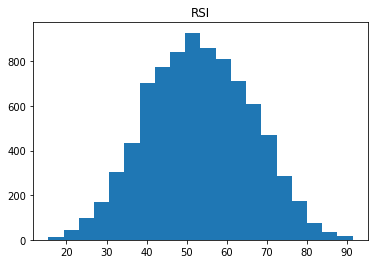

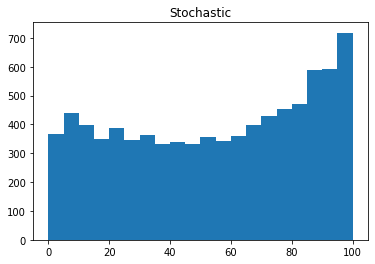

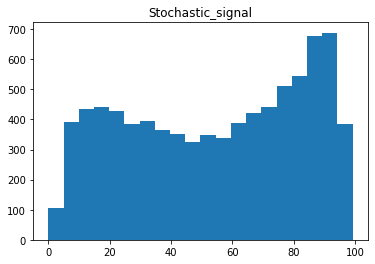

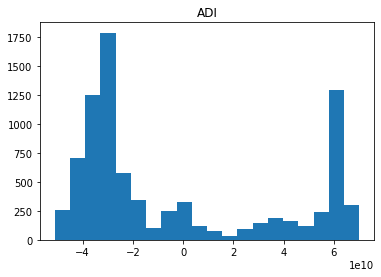

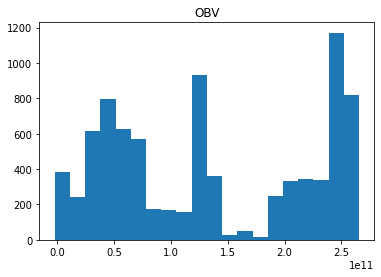

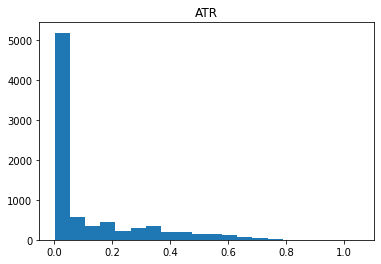

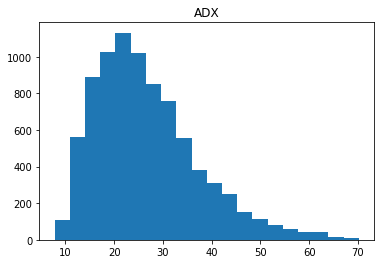

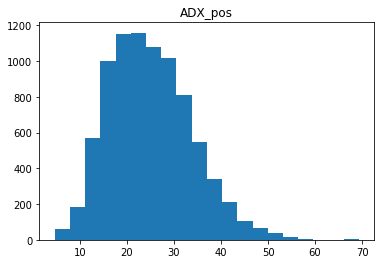

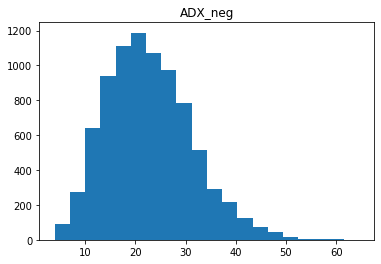

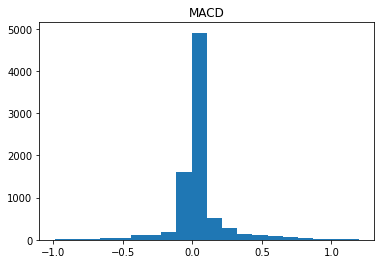

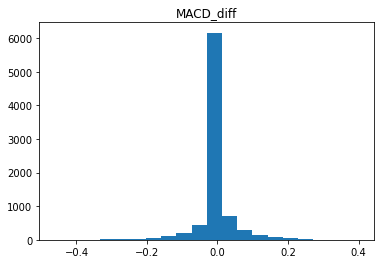

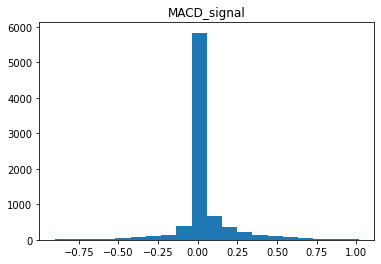

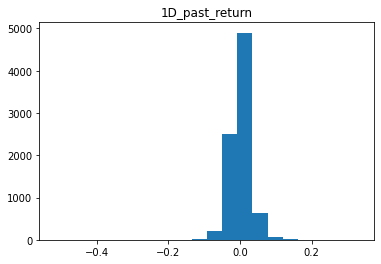

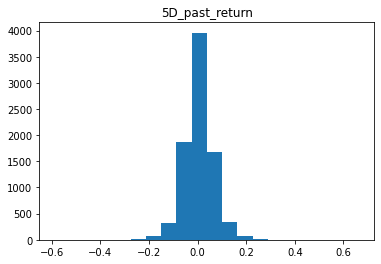

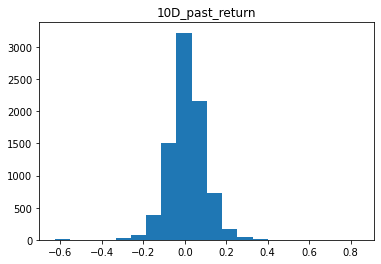

In [21]:
import matplotlib.pyplot as plt
for col in INPUT_COLS:
    plt.hist(train_dirty[train_dirty['ticker'] == 'AAPL'][col], bins=20)
    plt.title(col)
    plt.show()

In [ ]:
train_dirty['1D_past_return']

In [23]:
train_dirty['ticker'].unique()

array(['BLF', 'UAL', 'LLIT', 'WORX', 'LECO', 'BLDP', 'CRW', 'MYT', 'JVA',
       'HSTO', 'AMTX', 'ASTC', 'SHSP', 'WW', 'SMBK', 'ARCT', 'WATT',
       'ASP', 'MRN', 'SALM', 'ALT', 'OPTT', 'AVEO', 'SGMO', 'LPTH',
       'ITCI', 'NXTD', 'MARK', 'BPOP', 'ISN', 'NVMI', 'MTEM', 'FWONK',
       'BLRX', 'PPBT', 'DARE', 'BYFC', 'BNSO', 'IDEX', 'EPZM', 'PULM',
       'XSPA', 'CXDC', 'FLXN', 'DAIO', 'SUPN', 'NV', 'YTEN', 'AVGR',
       'ASRT', 'VG', 'SAVA', 'XELB', 'ASMB', 'MEIP', 'EVOK', 'RWLK',
       'CBLI', 'FTFT', 'VBFC', 'MDWT', 'MED', 'LJPC', 'VIVE', 'ADM', 'CP',
       'ASUR', 'BLDR', 'NATR', 'RDCM', 'APDN', 'SINO', 'ZIOP', 'ENSG',
       'EYEG', 'VTNR', 'CASI', 'CAPR', 'PPC', 'MDCA', 'LINC', 'WWR',
       'RGL', 'CDMO', 'APEN', 'IMMP', 'LIVE', 'PIR', 'CHCI', 'ANAB',
       'GYRO', 'CIDM', 'ATSG', 'AEZ', 'ATRC', 'GWPH', 'JAN', 'CYTK',
       'RIGL', 'NETE', 'YMTX', 'MICT', 'PSTI', 'NURO', 'ACHV', 'OSN',
       'TCCO', 'MDRX', 'CYCC', 'AXGN', 'TXMD', 'RBCN', 'ODP', 'IMBI',
       'AERI', '

In [ ]:
len(train_df_clean)

In [ ]:
plt.hist(train_df_clean['10TD_return'], bins=50)

In [ ]:
scaler = RobustScaler()

scaler.fit(train_df[INPUT_COLS])

train_clean = train_df_clean.copy()
train_clean[INPUT_COLS] = scaler.transform(train_df_clean[INPUT_COLS])
test_df.loc[:, INPUT_COLS] = scaler.transform(test_df[INPUT_COLS])

In [ ]:
train_clean

In [ ]:
tickers = df['ticker'].unique()

In [ ]:
len(tickers)

In [ ]:
train_x_dfs = []
train_y_dfs = []
test_x_dfs = []
test_y_dfs = []

In [ ]:
ticker_counter = 0
empty_tickers = 0
for ticker in tickers:
    if ticker in list(train_clean['ticker']):
        ticker_train_df = train_clean[train_clean['ticker'] == ticker]
        ticker_train_x, ticker_train_y = build_arrays(ticker_train_df,input_cols=INPUT_COLS, target_col='20D_return_bin', time_window=30, stride=1)
        if len(ticker_train_x) != 0:
            train_x_dfs.append(ticker_train_x)
            train_y_dfs.append(ticker_train_y)
        else:
            empty_tickers += 1
        ticker_counter += 1
        if ticker_counter % 50 == 0:
            print(f'{ticker_counter} files processed, {round(ticker_counter/len(tickers)*100)}%, empty tickers: {empty_tickers}')

In [ ]:
import joblib

joblib.dump(train_x_dfs, '../raw_data/feature_arrays/train_x_dfs')

In [ ]:
joblib.dump(train_y_dfs, '../raw_data/feature_arrays/train_y_dfs')

In [ ]:
list(test_df['ticker'].unique())

In [ ]:
ticker_counter = 0
ticker_processed = 0
empty_tickers = 0
for ticker in tickers:
    ticker_counter += 1
    if ticker in list(test_df['ticker'].unique()):
        ticker_test_df = test_df[test_df['ticker'] == ticker]
        ticker_test_x, ticker_test_y = build_arrays(ticker_test_df, input_cols=INPUT_COLS, target_col='20D_return_bin', time_window=30, stride=1)
        if len(ticker_test_x) != 0:
            test_x_dfs.append(ticker_test_x)
            test_y_dfs.append(ticker_test_y)
            ticker_processed += 1
        else:
            empty_tickers += 1
        if ticker_counter % 50 == 0:
            print(f'{ticker_counter} tickers processed, {round(ticker_counter/len(tickers)*100)}%, empty tickers: {empty_tickers}, tikers done {ticker_processed}')

In [ ]:
import joblib
joblib.dump(test_x_dfs, '../raw_data/feature_arrays/test_x_dfs')
joblib.dump(test_y_dfs, '../raw_data/feature_arrays/test_y_dfs')

In [ ]:
len(test_x_dfs)

In [ ]:
test_x_dfs = joblib.load('../raw_data/feature_arrays/test_x')

In [ ]:
test_y_dfs = joblib.load('../raw_data/feature_arrays/test_y')

In [ ]:
len(test_x_dfs)

In [ ]:
import numpy as np

In [ ]:
empty_idxs = []
for i in range(len(test_x_dfs)):
    if len(test_x_dfs[i]) == 0:
        empty_idxs.append(i)

In [ ]:
empty_idxs

In [ ]:
len(test_x_dfs)

In [ ]:
train_x_dfs = np.delete(np.array(train_x_dfs), empty_idxs)

In [ ]:
len(train_y_dfs)

In [ ]:
train_x_dfs = list(train_x_dfs)

In [ ]:
len(train_x_dfs)

In [ ]:
count_empty = 0
for i in range(len(train_x_dfs)):
    if len(train_x_dfs[i]) == 0:
        #el = train_x_dfs[i]
        count_empty += 1
    
print(count_empty)
    

In [1]:
import joblib

In [2]:
train_y_dfs = joblib.load('../raw_data/feature_arrays/train_y_dfs')

In [4]:
train_y_dfs[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False,  True, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [5]:
import numpy as np
#X_train = np.concatenate(train_x_dfs)
y_train = np.concatenate(train_y_dfs)
#X_test = np.concatenate(test_x_dfs)
#y_test = np.concatenate(test_y_dfs)

In [7]:
y_train.shape

(3710271,)

In [ ]:
joblib.dump(y_test, '../raw_data/feature_arrays/y_test_array')

In [ ]:
y_train.shape

In [ ]:
import joblib

In [6]:
joblib.dump(y_train, '../raw_data/feature_arrays/y_train_array')

['../raw_data/feature_arrays/y_train_array']

In [ ]:
joblib.dump(train_x_dfs, '../raw_data/feature_arrays/x_train_array')

In [ ]:
train_x_dfs[0].shape

In [ ]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [ ]:
X_train.shape

In [ ]:
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [ ]:
indx = list(range(len(X_train)))

In [ ]:
sample_indx = random.sample(indx, 100000)

In [ ]:
X_train =  X_train[[sample_indx], :][0]

In [ ]:
y_train = y_train[[sample_indx]]

In [ ]:
# from tensorflow.keras.backend import expand_dims
# X_train = expand_dims(X_train, axis=-1)
# X_test = expand_dims(X_test, axis=-1)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[1])
plt.show()
plt.imshow(X_train[1000])

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers, models 
from tensorflow.keras.optimizers import RMSprop, Adam

optim = RMSprop(learning_rate=0.0001)

def init_model():
    model = Sequential()
    model.add(layers.LSTM(20, return_sequences=True, input_shape=(30,15), activation='tanh'))
    model.add(layers.LSTM(20, activation='tanh'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy'])
    
    return model

In [ ]:
model = init_model()

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)

model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=8,
          validation_split=0.2,
          callbacks=[es]
         )

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred.shape

In [ ]:
y_test.sum()/len(y_test)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
for i in range(0, len(y_pred), 10):
    print(f'Predicted {y_pred[i][0] >= 0.5}, test {y_test[i]}')

In [ ]:
def initialize_model_2():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(30, 4, 1), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, (2, 2), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

In [ ]:
model_2 = initialize_model_2()

model_2.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

es = EarlyStopping(patience=5, restore_best_weights=True)

model_2.fit(X_train, y_train, 
          epochs=200, 
          batch_size=8,
          validation_split=0.2,
            callbacks=[es]
         )

In [ ]:
y_test.sum()/y_test.shape[0]

In [ ]:
y_pred = model.predict(X_test)